Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Data cleaning, transformations, & versioning: Problem solving

This session will use the `mpg` dataset, which contains measurements of fuel economy and other properties of cars from the 1970s, to practice data cleaning, transformation, and versioning concept.s

| Variable     | Type     | Description                              |
|:--------------|:----------|:------------------------------------------|
| mpg          | Ratio    | Miles per gallon; fuel economy           |
| cylinders    | Ordinal  | Number of cylinders in engine            |
| displacement | Ratio    | Volume inside cylinders (likely inches)                  |
| horsepower   | Ratio    | Unit of power                            |
| weight       | Ratio    | Weight of car (likely pounds)                           |
| acceleration | Ratio    | Acceleration of car (likely in seconds to 60 MPH) |
| model_year   | Interval | Year of car manufacture; last two digits |
| origin       | Nominal  | Numeric code corresponding to continent  |
| name     | Nominal  | Car model name (ID)                      |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>
<br>

## Missing data

Import `pandas` so you can load a dataframe.

In [18]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="importAs" id="Q%nZ$%KG#|1A:4A9|%=4" x="16" y="10"><field name="libraryName">pandas</field><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field></block></xml>

Load a dataframe with `datasets/mpg-na-hidden.csv` and display it.

In [19]:
dataframe = pd.read_csv('datasets/mpg-na-hidden.csv',na_values=["?"])

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="b?N6-i,)knP9k=Cx-aQo" x="74" y="218"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="IduV!unUxquz$R)OF$8Q"><mutation items="2"></mutation><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="UV-{,|(UTl=c/MWb]u5W"><field name="TEXT">datasets/mpg-na-hidden.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="DFyp`q!g^B9HUlhF8x%;"><field name="CODE">na_values=["?"]</field></block></value></block></value></block><block type="variables_get" id="Db(XgspuHOj8$BWD85L}" x="52" y="297"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


-----------
**QUESTION:**

Do you think there are any `NaN` values? Why? 

**ANSWER: (click here to edit)**

*Not that I can see*
<hr>

`describe` the dataframe.

In [20]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id="^yCV!E3eMZL.3}#4MS8r" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Look at the min, mean, and max.

-----------
**QUESTION:**

Do you think there are any `NaN` values? Why and what are they?

**ANSWER: (click here to edit)**

*Horsepower can't be zero*
<hr>

One way to tell if your guess is correct is to plot the variable(s) in question.

To make a plots, import `plotly.express`.

In [21]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable></variables><block type="importAs" id="Zq^c/BhiMuX?Od,m^$/)" x="-161" y="4"><field name="libraryName">plotly.express</field><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field></block></xml>

Now plot a histogram with the variable(s) in question.

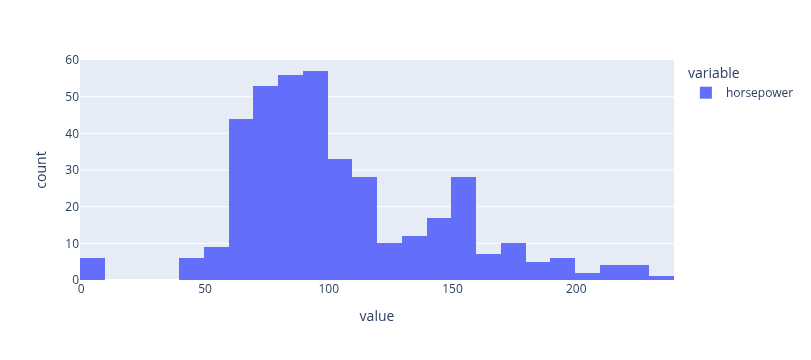

In [22]:
px.histogram(dataframe['horsepower'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id=";3XBa2S8*(1iI?altE[v" x="-115" y="207"><mutation items="1"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="indexer" id="ZQGGecy}9v^qC^zH#438"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id=":5!?d_2r8:.l]OVh|M|M"><field name="TEXT">horsepower</field></block></value></block></value></block></xml>

Another way to see this is with a boxplot.
Copy the code above, but change `histogram` to `box`.

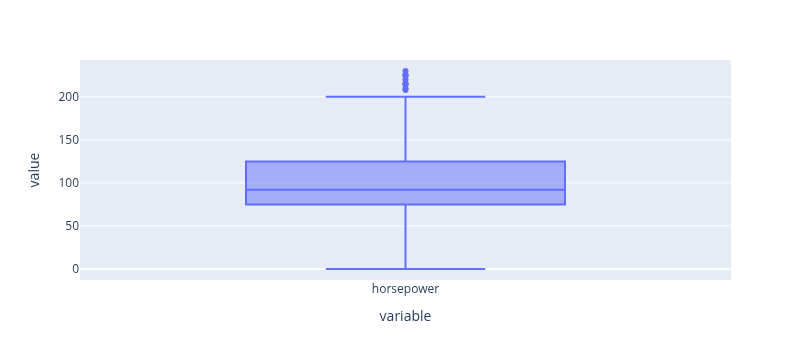

In [23]:
px.box(dataframe['horsepower'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id=";3XBa2S8*(1iI?altE[v" x="-115" y="207"><mutation items="1"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">box</field><data>px:box</data><value name="ADD0"><block type="indexer" id="ZQGGecy}9v^qC^zH#438"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id=":5!?d_2r8:.l]OVh|M|M"><field name="TEXT">horsepower</field></block></value></block></value></block></xml>

-----------
**QUESTION:**

Does these plots support your guess?
How do we know this is missing data and not outliers?


**ANSWER: (click here to edit)**


*Yes. Not an outlier because horsepower can't be zero*
<hr>

Load the dataframe again, but this time tell `pandas` that the value you found is `NaN`

In [24]:
dataframe = pd.read_csv('datasets/mpg-na-hidden.csv',na_values=["0"])

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="b?N6-i,)knP9k=Cx-aQo" x="74" y="218"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="IduV!unUxquz$R)OF$8Q"><mutation items="2"></mutation><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="UV-{,|(UTl=c/MWb]u5W"><field name="TEXT">datasets/mpg-na-hidden.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="DFyp`q!g^B9HUlhF8x%;"><field name="CODE">na_values=["0"]</field></block></value></block></value></block><block type="variables_get" id="Db(XgspuHOj8$BWD85L}" x="52" y="297"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


-----------
**QUESTION:**

You have two choices at this point: `dropna` or `fillna` with another value (like the median).
Which would you do, and why?


**ANSWER: (click here to edit)**

*I'd `dropna` since it's just six rows.*

<hr>

Do whichever of the two options you chose above.

In [25]:
dataframe.dropna()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id="EgTd:Xz]e0WGIKLVW6Su" x="-2" y="188"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">dropna</field><data>dataframe:dropna</data></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


## Transforming data

### Outliers

`clip` the values below the 1st percentile and above the 99th percentile for each variable in the dataframe, save this in the dataframe, and display it.

In [26]:
dataframe.clip(dataframe.quantile(0.01,numeric_only=True),dataframe.quantile(0.99,numeric_only=True),axis=1)

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id="=X,Xz;1HmgnYDU{uM;j}" x="59" y="349"><mutation items="3"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">clip</field><data>dataframe:clip</data><value name="ADD0"><block type="varDoMethod" id="B(#[`;7U(5;A$dY9|*/g"><mutation items="2"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="ADD0"><block type="math_number" id="0cCw7vNV6P*]CpF2cIeq"><field name="NUM">0.01</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Zb#)X)$O|SQTBk6k=];f"><field name="CODE">numeric_only=True</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="]P!}OG8@M#XL#.zc%prR"><mutation items="2"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="ADD0"><block type="math_number" id="8]6p2:^I*Lwc$;`vy/wc"><field name="NUM">0.99</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="3G^8{Vc2=_7T]7054xjK"><field name="CODE">numeric_only=True</field></block></value></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="gbFUHZwYi!K:kEOHI!9I"><field name="CODE">axis=1</field></block></value></block><block type="variables_get" id="PNqfL95iCFxEb:T9oPa|" x="51" y="540"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


-----------
**QUESTION:**

Did anything happen that you didn't expect? Are you concerned? What could you do about it?


**ANSWER: (click here to edit)**


*name is now all NaN. 
If this were a variable, I'd be concerned, but its actually an ID. 
So we could load the dataframe tell pandas this is an id, and we'd avoid this particular problem.
However it's good to know how `clip` behaves with nominal variables.*
<hr>

`describe` the dataframe again.

In [27]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id="^yCV!E3eMZL.3}#4MS8r" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


-----------
**QUESTION:**

Did the min, mean, and max change?
What about the 25th, 50th (median), and 75th percentiles?
Are you surprised?


**ANSWER: (click here to edit)**


*The min, mean, max all changed slightly.
The listed percentiles did not change, nor did we expect them to.*
<hr>

### Non-normality

Plot a histogram of `displacement`.

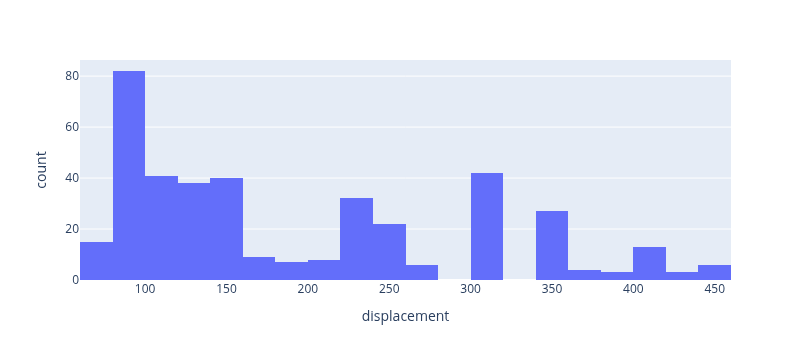

In [28]:
px.histogram(dataframe,x="displacement")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id=";3XBa2S8*(1iI?altE[v" x="-115" y="207"><mutation items="2"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="BwJzSVtxVG};cH=9|/.*"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~BA1[^jmdq+qzIO-z`s1"><field name="CODE">x="displacement"</field></block></value></block></xml>

-----------
**QUESTION:**

Suppose we wanted to predict `displacement` in a linear regression.
Should we transform it to make it more normal?


**ANSWER: (click here to edit)**


*Possibly.
It does seem skewed to the right, though I'm not convinced transforming it is the right way to deal with it.*
<hr>

Import `numpy` so you can transform `displacement`.

In [29]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="]r.MVxn$.B;84`lPo@#0">np</variable></variables><block type="importAs" id="405[o%Y^^u?jrH7uGE3H" x="50" y="96"><field name="libraryName">numpy</field><field name="VAR" id="]r.MVxn$.B;84`lPo@#0">np</field></block></xml>

Plot a log transformed `displacement`.

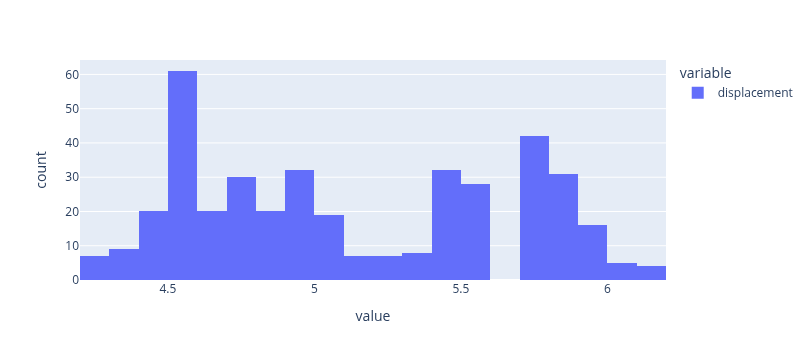

In [30]:
px.histogram(np.log1p(dataframe["displacement"]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable></variables><block type="varDoMethod" id=";3XBa2S8*(1iI?altE[v" x="-115" y="207"><mutation items="1"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="v2~j@?227+GX^/(Du7(P"><field name="CODE">np.log1p(dataframe["displacement"])</field></block></value></block></xml>

-----------
**QUESTION:**

Is this better?
What else might you consider doing?


**ANSWER: (click here to edit)**


*It might be better, but its not clearly better.
It almost looks like it is bimodal now (with two peaks).
I wonder if we should create a new varible that reflects these peaks, which would be a binary variable like `sportscar`=Yes or No*
<hr>

## Create new variables

Create a new variable `ratio` in the dataframe that is `weight` divided by `horsepower`.
This is called the power to weight ratio.

In [31]:
dataframe = dataframe.assign(ratio= (dataframe['weight'] / dataframe['horsepower']))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="variables_set" id="o1ct$+ge.@t#IWxzqDuf" x="-177" y="104"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="{60QkieNtlIe!8pofv*j"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">assign</field><data>dataframe:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="X/E.e+WlpSIe/yc:L^Bx"><field name="CODE">ratio=</field><value name="INPUT"><block type="math_arithmetic" id="(@KKNt8RN{99pjjzOzhf"><field name="OP">DIVIDE</field><value name="A"><shadow type="math_number" id="WZW,S?V3a!yHpWw}3wgh"><field name="NUM">1</field></shadow><block type="indexer" id="U,rmi6B;8.sp]Wp]-cDs"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id="+CzdXBJrqJ_kB;uryeTt"><field name="TEXT">weight</field></block></value></block></value><value name="B"><shadow type="math_number" id="p3:TTG6s0VGd$!+33Tt%"><field name="NUM">1</field></shadow><block type="indexer" id="^?_42r/5u_]V)l!tEXi^"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id="ODv=7HD#(EacB]av0dbv"><field name="TEXT">horsepower</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="(6Afq^C~smg)Yqm.BpSu" x="-192" y="296"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,ratio
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,26.953846
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,22.381818
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22.906667
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22.886667
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,24.635714
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,32.441860
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,40.961538
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,27.321429
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,33.227848


Compare `ratio` to `weight` and `horsepower` in three plots.

First, plot the histogram of weight.

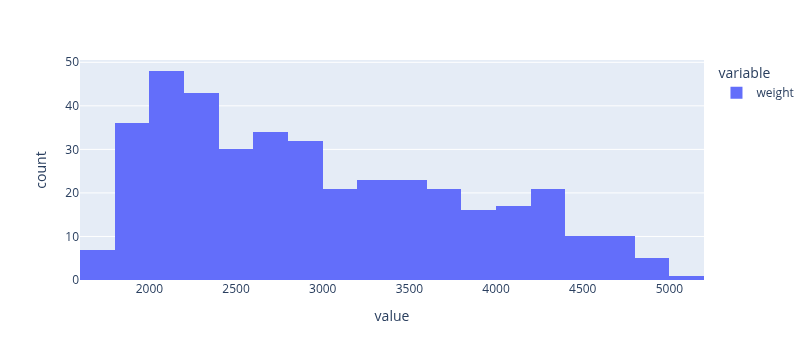

In [32]:
px.histogram(dataframe['weight'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id=";3XBa2S8*(1iI?altE[v" x="-115" y="207"><mutation items="1"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="indexer" id="ZQGGecy}9v^qC^zH#438"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id=":5!?d_2r8:.l]OVh|M|M"><field name="TEXT">weight</field></block></value></block></value></block></xml>

Next plot the histogram of `horsepower`.

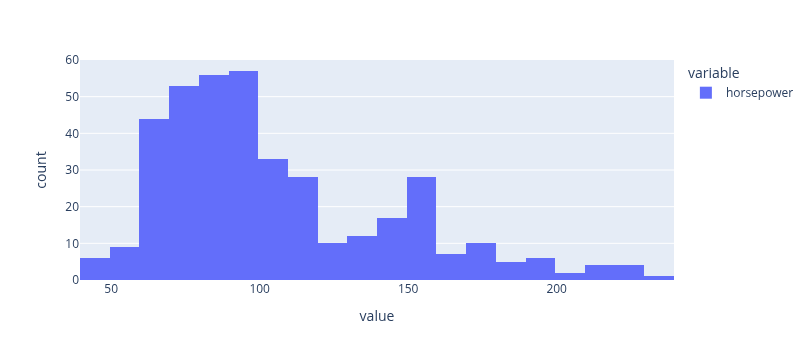

In [33]:
px.histogram(dataframe['horsepower'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id=";3XBa2S8*(1iI?altE[v" x="-115" y="207"><mutation items="1"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="indexer" id="ZQGGecy}9v^qC^zH#438"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id=":5!?d_2r8:.l]OVh|M|M"><field name="TEXT">horsepower</field></block></value></block></value></block></xml>

Finally plot the histogram of `ratio`.

In [34]:
px.histogram(dataframe['ratio'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id=";3XBa2S8*(1iI?altE[v" x="-115" y="207"><mutation items="1"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="indexer" id="ZQGGecy}9v^qC^zH#438"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id=":5!?d_2r8:.l]OVh|M|M"><field name="TEXT">ratio</field></block></value></block></value></block></xml>

-----------
**QUESTION:**

What can you say about the distributions of variables in these three plots?
How does it make you feel about `ratio`?


**ANSWER: (click here to edit)**

*The first two plots are not particularly normal, but `ratio` is.
This makes me thing that `ratio` is picking up on an interesting property of the data: heavier cars need bigger engines just to move themselves, and we seem to need 1 hp for every 30lbs of vehicle for car-like performance.*
<hr>

## Versioning

Try to make a commit using your current workspace. 

-----------
**QUESTION:**

Was there anything about your workspace in `git` that surprised you?


**ANSWER: (click here to edit)**

*It appears the notebooks are already in `git` with an extensive history.*

<hr>

<!--  -->